# Cars
* examine the data
* examine the types
* look at the dimensions

In [15]:
head(mtcars)

sapply(mtcars, class)
dim(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1


mpg       cyl      disp        hp      drat        wt      qsec        vs 
"numeric"  "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
       am      gear      carb 
"numeric" "numeric" "numeric"

[1] 32 11

* load the caret library
* use it to partition data into train and test sets
* examine dimensions of those sets

In [9]:
library(caret)
set.seed(1024)
index.train <- createDataPartition(mtcars$cyl, p = 0.8, list = FALSE)
train = mtcars[index.train,]
test  = mtcars[-(index.train), ]

dim(train)
dim(test)

[1] 27 11

[1]  5 11

* use glm() to create a model of mpg based on hp
* inspect the model

In [12]:
model <- glm(mpg ~ hp, data = train)
model


Call:  glm(formula = mpg ~ hp, data = train)

Coefficients:
(Intercept)           hp  
   29.00751     -0.05889  

Degrees of Freedom: 26 Total (i.e. Null);  25 Residual
Null Deviance:	    739 
Residual Deviance: 291.6 	AIC: 146.9

hp model reduces degrees of freedom by only 1, while drastically lower deviance. This implies HP is a significant factor. 

Model is mpg = 29.00751 - hp * 0.05889

below, we use that to predict mpg on our test set

In [18]:
test$predicted <- predict(model, test)
test[, c('hp', 'mpg', 'predicted')]

,hp,mpg,predicted
Merc 280C,123.00000,17.80000,21.76413
Cadillac Fleetwood,205.0000,10.4000,16.9352
Lincoln Continental,215.00000,10.40000,16.34631
Toyota Corolla,65.00000,33.90000,25.17971
Volvo 142E,109.00000,21.40000,22.58858


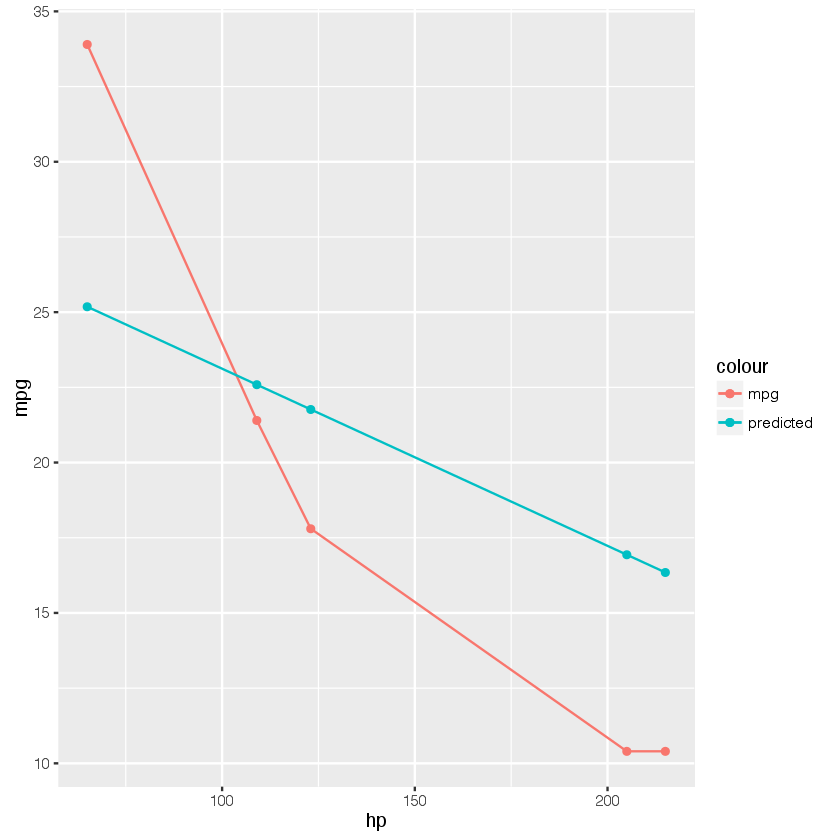

In [34]:
library(ggplot2)
qplot(hp, mpg, data = test, color = "mpg", geom = c('point', 'line')) + 
geom_point(aes(hp, predicted, color = 'predicted')) + 
geom_line(aes(hp, predicted, color = "predicted"))